# **TITLE**

# Research

## **Import Library**

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier


## **Import Data**

In [6]:
df = pd.read_csv('ibm data.csv')

### Data Type Check (David)


In [8]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,1,80,1,6,2,2,2,0,2,0
1347,36,No,Travel_Frequently,1213,Human Resources,2,1,Human Resources,1,1890,...,4,80,0,10,2,2,10,1,0,8
932,29,Yes,Travel_Rarely,806,Research & Development,7,3,Technical Degree,1,1299,...,1,80,2,10,2,3,7,7,7,7
905,29,No,Travel_Rarely,694,Research & Development,1,3,Life Sciences,1,1264,...,2,80,2,9,2,2,7,7,1,7
1253,33,No,Non-Travel,1283,Sales,2,3,Marketing,1,1756,...,4,80,0,13,2,2,11,7,1,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Note:**  
Datatype masing-masing feature sudah sesuai

### Duplicates Handling (David)

In [12]:
df.duplicated().any()

False

**Note:**  
Data sudah bersih dari nilai duplikat

### Missing Values Handling (Reza)

## **Data Understanding / EDA**

### Descriptive Statistics (Reza)

In [17]:
# STEP 3: Informasi Umum Dataset
print("\n Informasi Dataset:")
print(df.info())

print("\n Statistik Deskriptif:")
print(df.describe(include='all'))



 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

### Univariate Analysis (Reza)

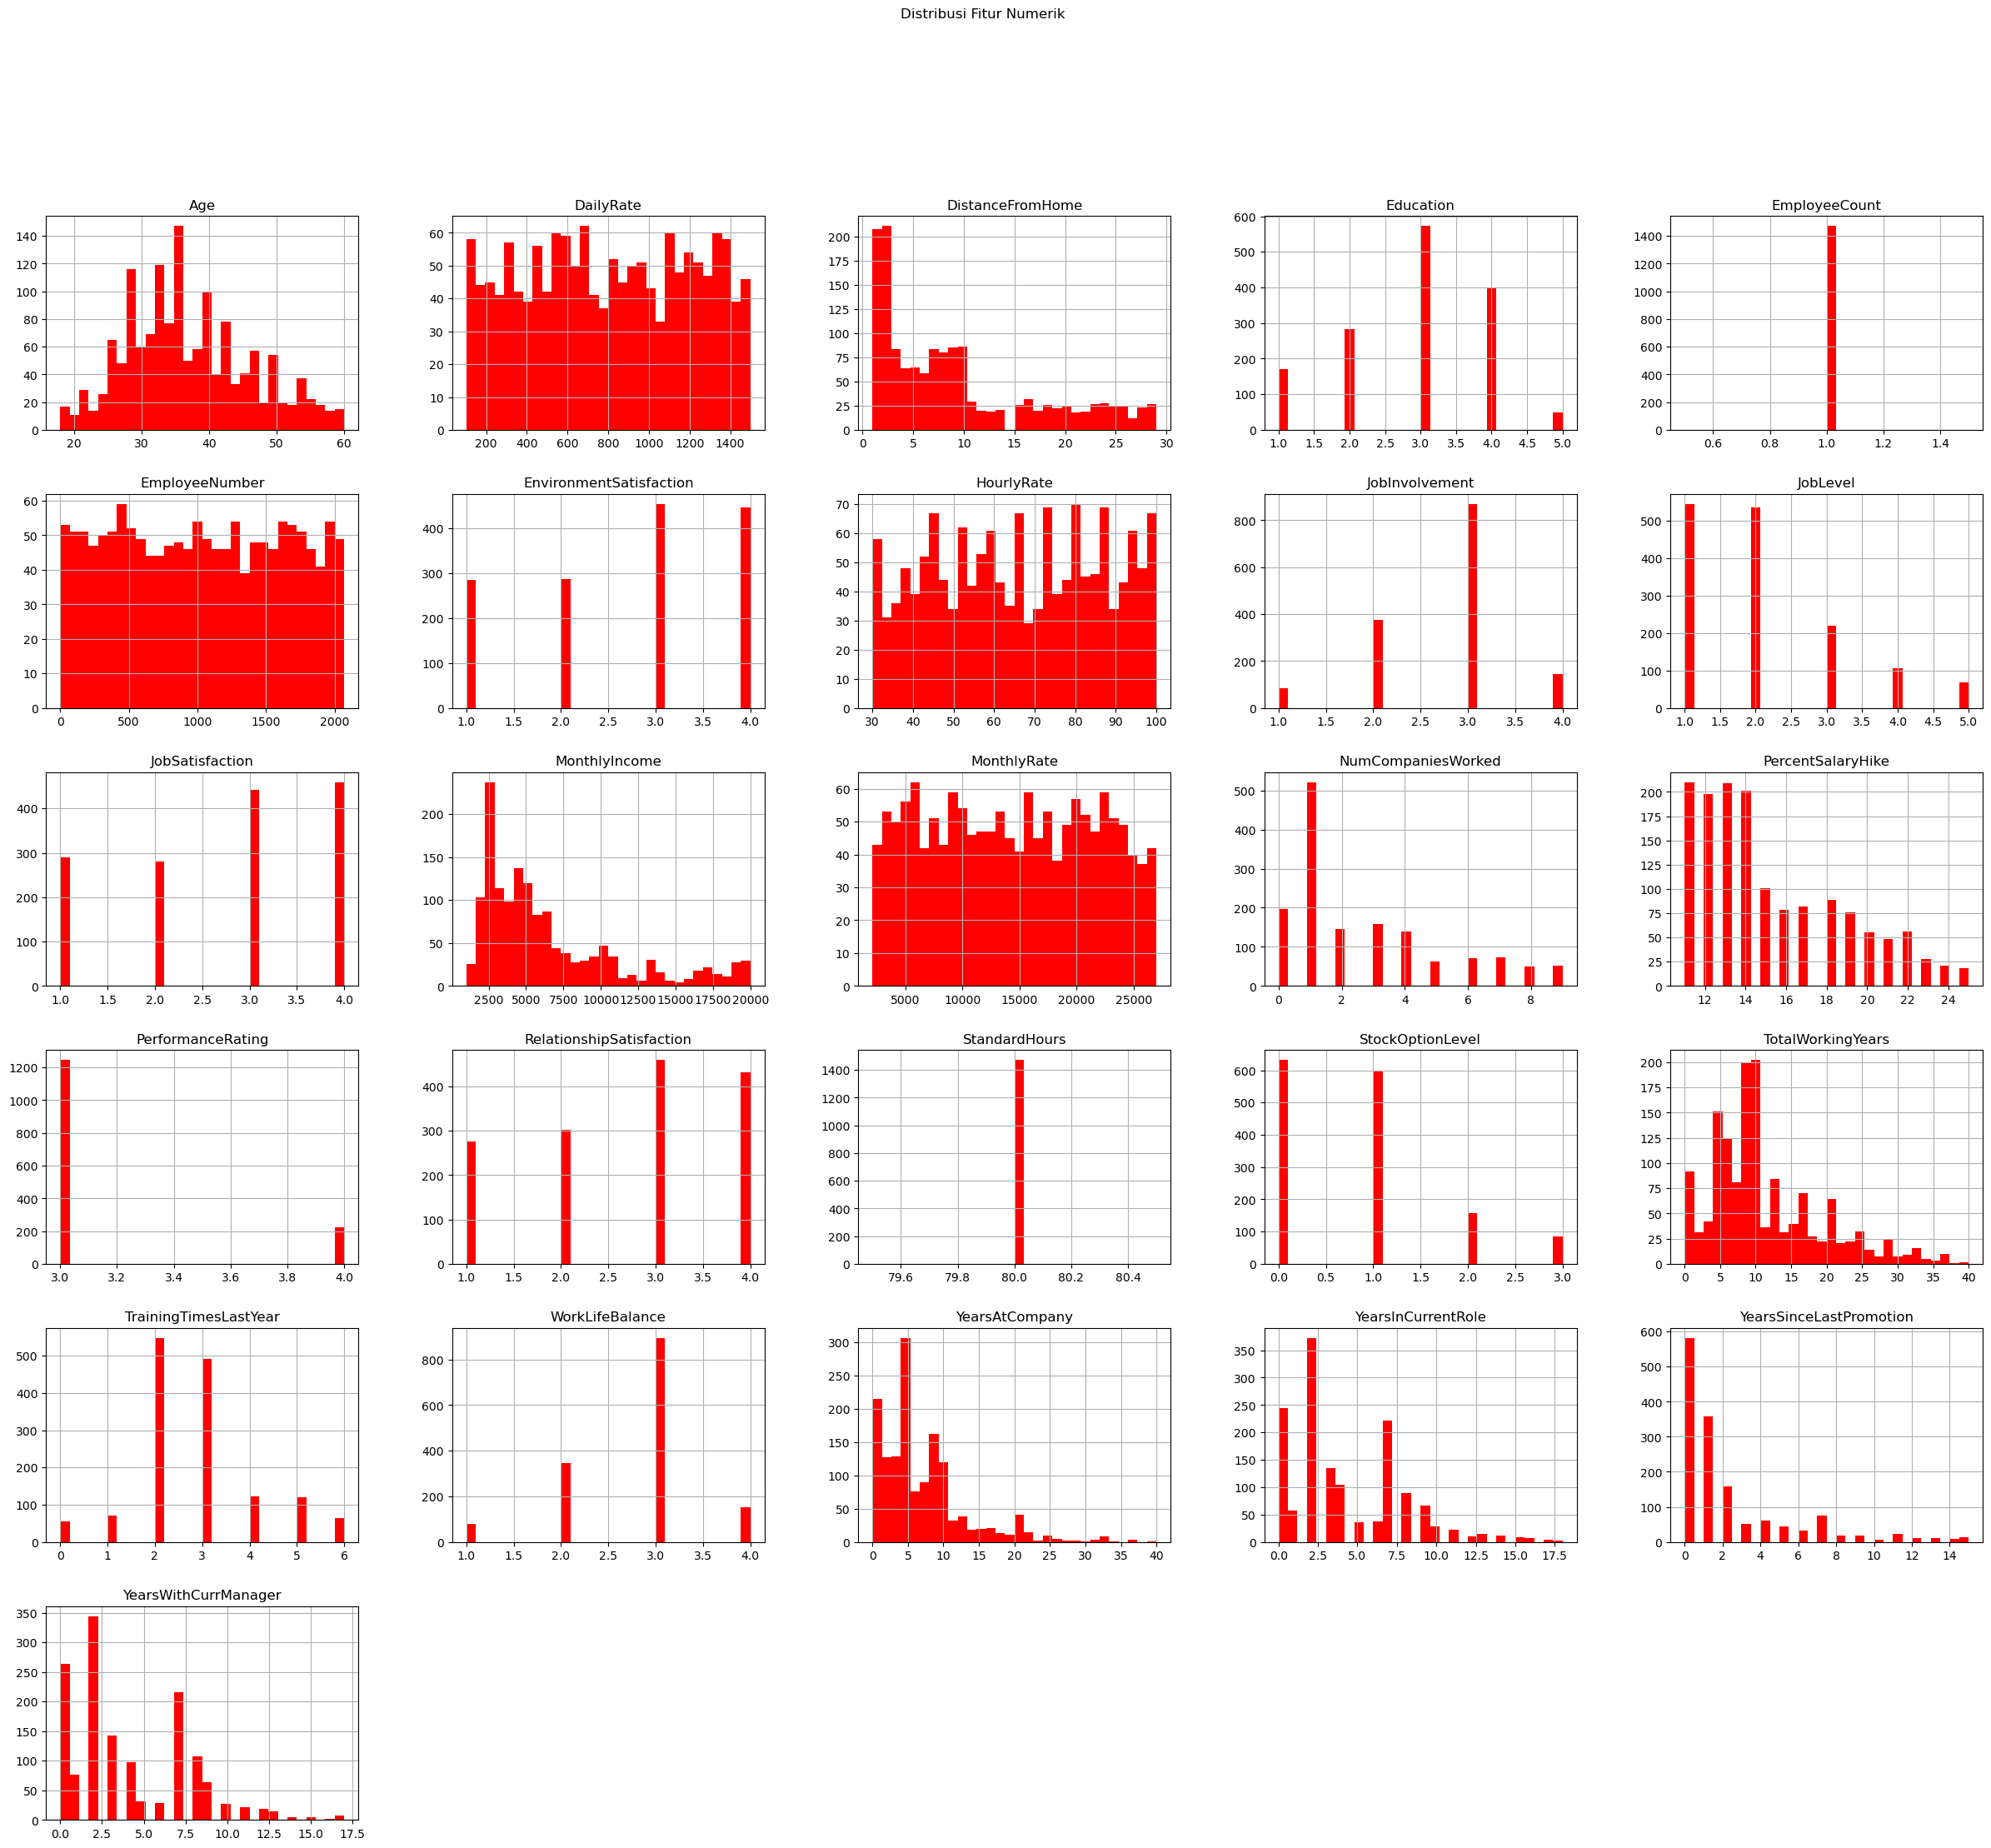

In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns
# HISTOGRAM NUMERIK
df[numeric_cols].hist(bins=30, figsize=(30,25), color='red')
plt.suptitle("Distribusi Fitur Numerik")
plt.show()


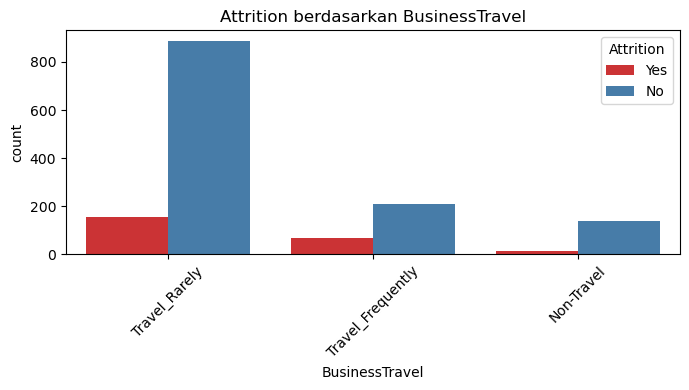

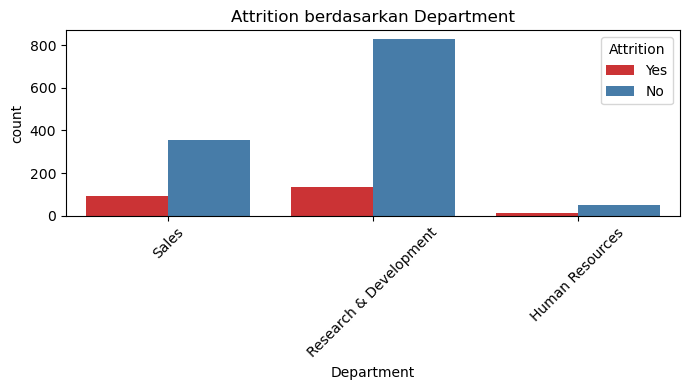

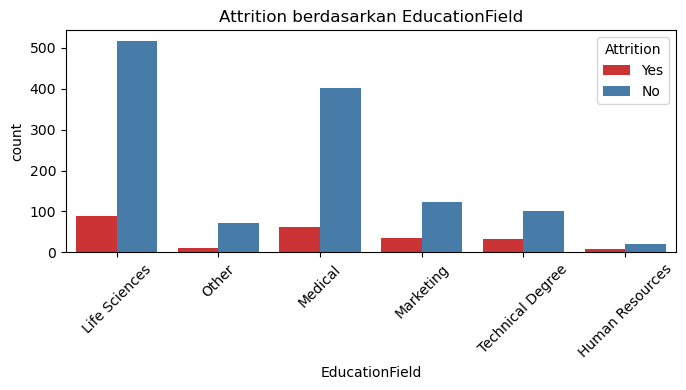

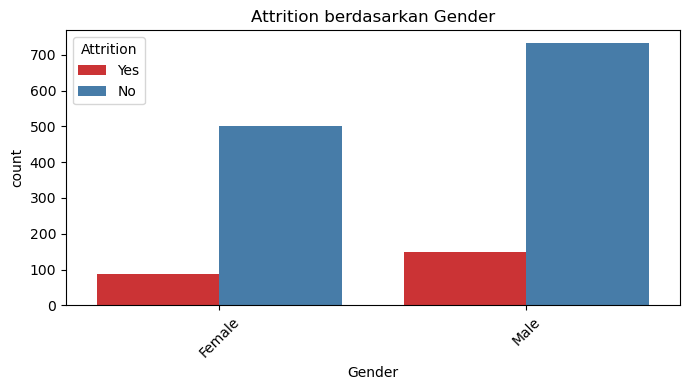

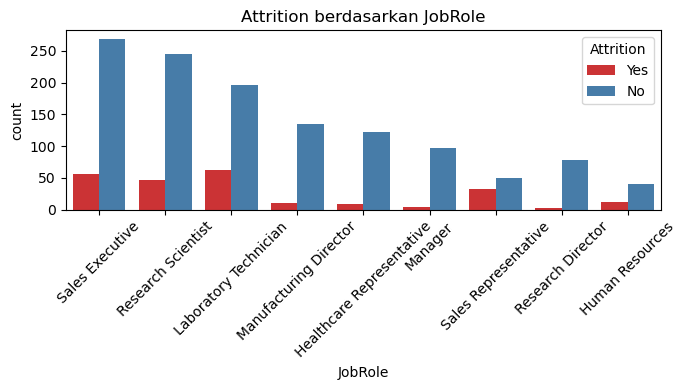

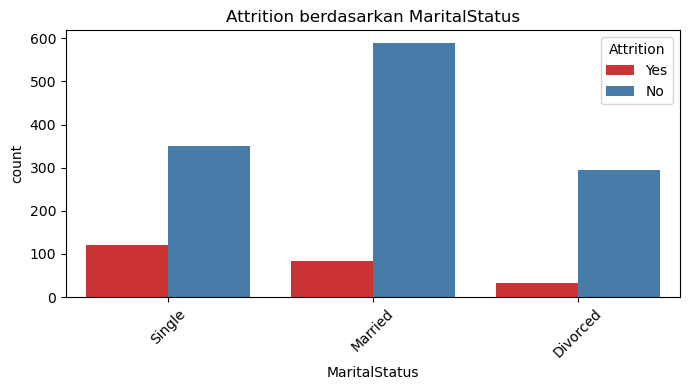

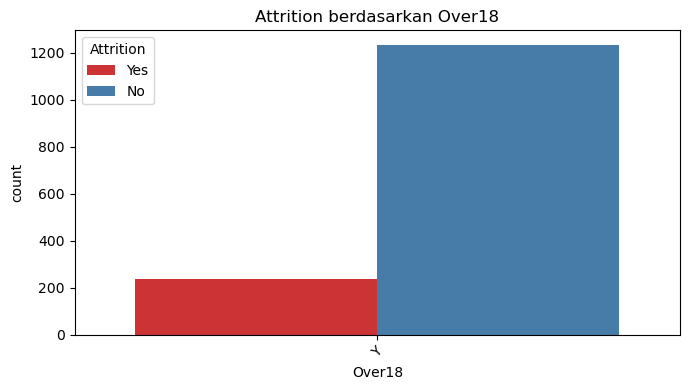

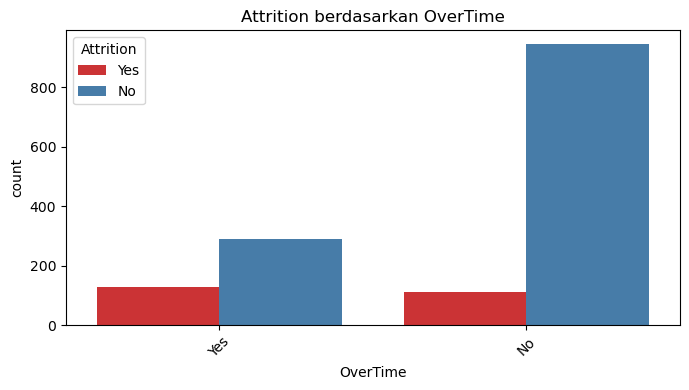

In [20]:
# KATEGORIK
cat_cols = df.select_dtypes(include='object').columns.drop('Attrition')

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Attrition', palette='Set1')
    plt.title(f'Attrition berdasarkan {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


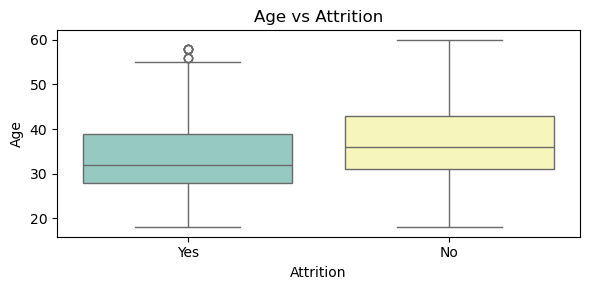

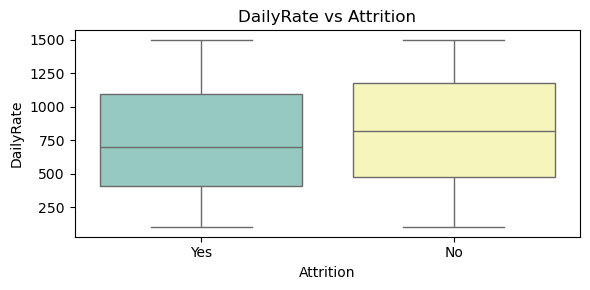

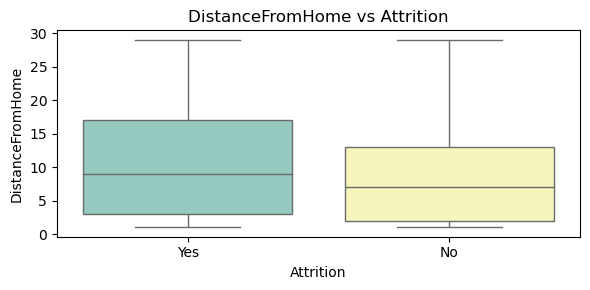

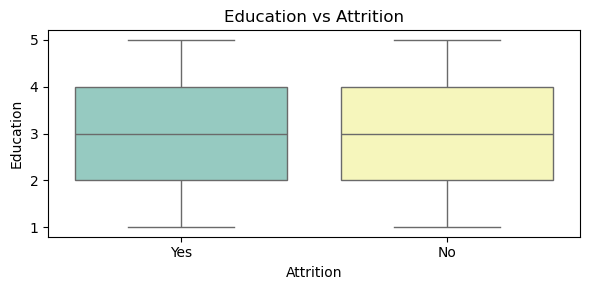

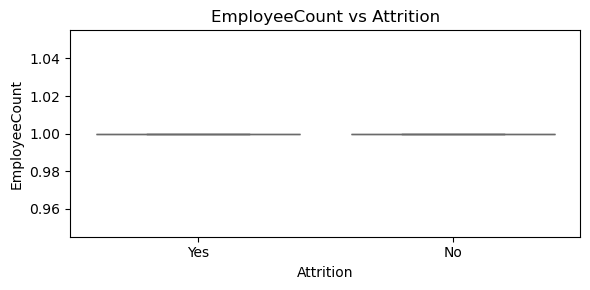

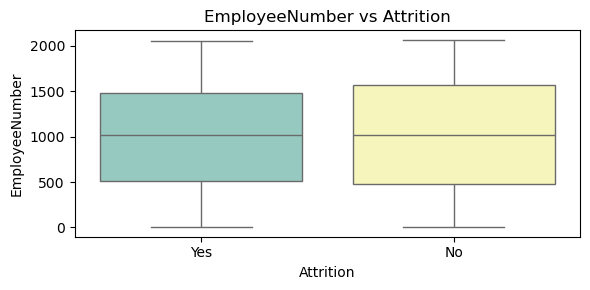

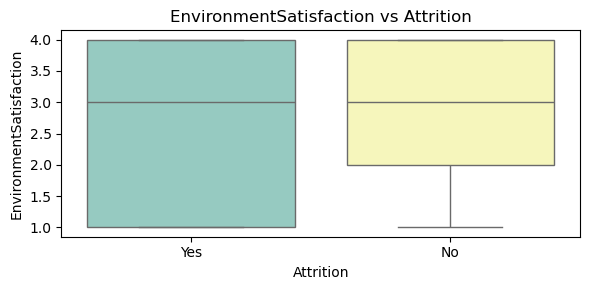

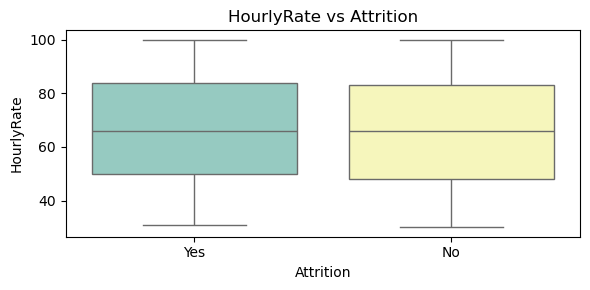

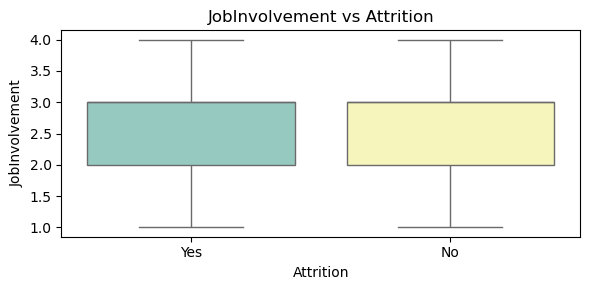

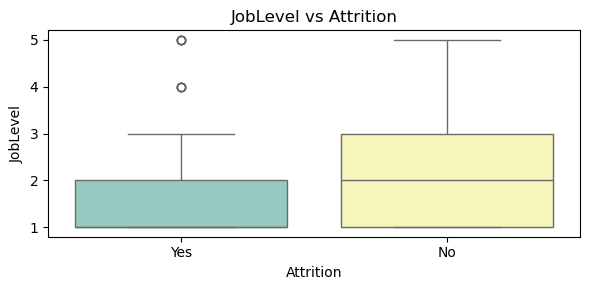

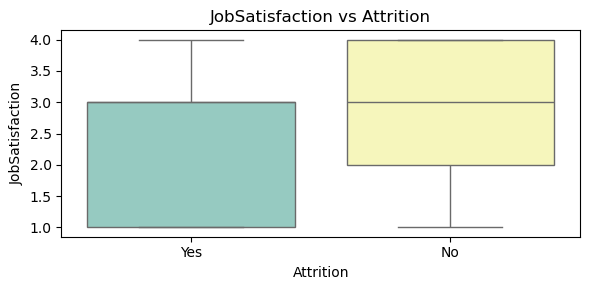

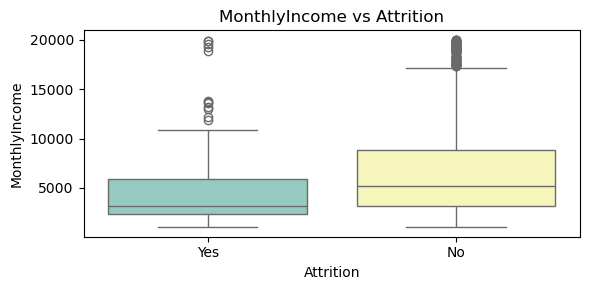

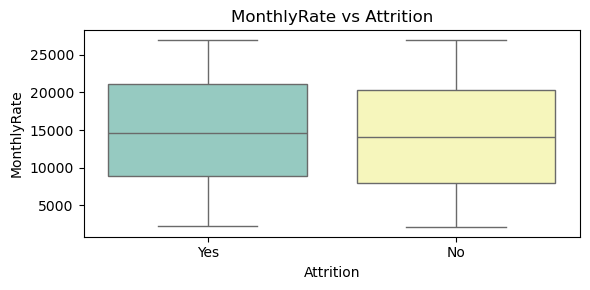

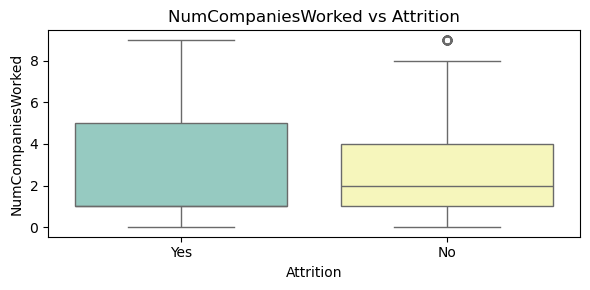

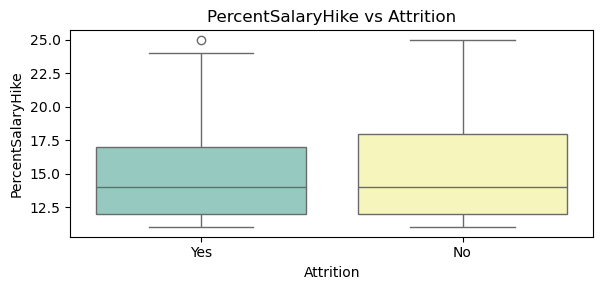

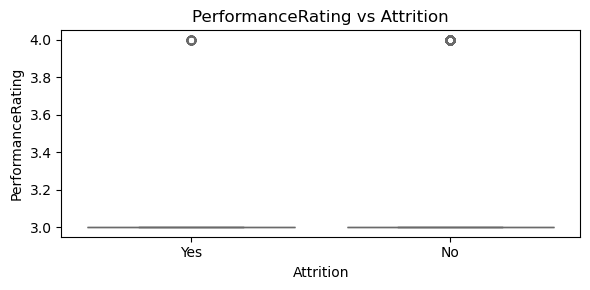

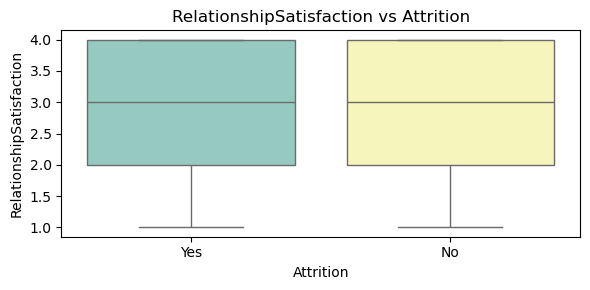

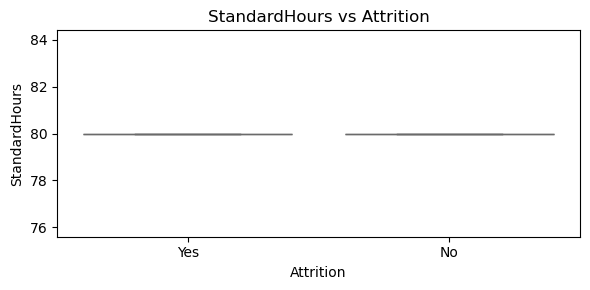

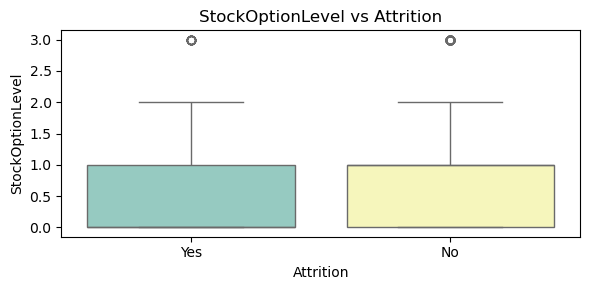

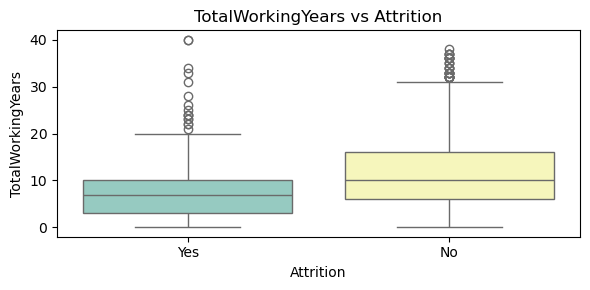

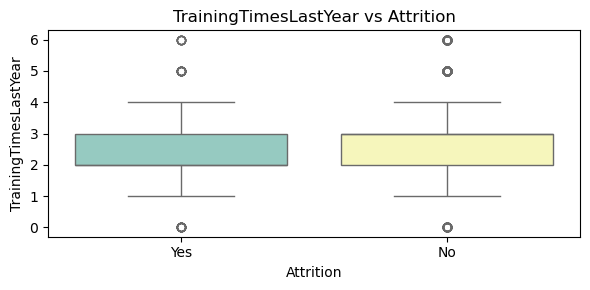

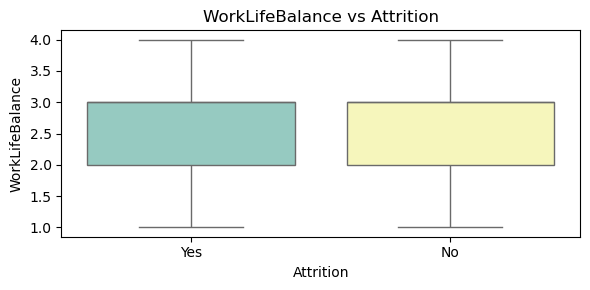

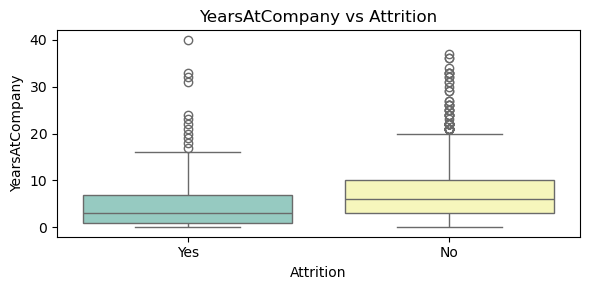

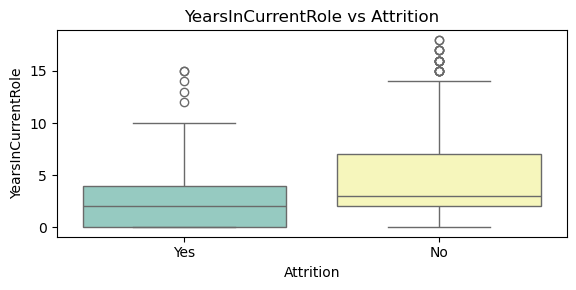

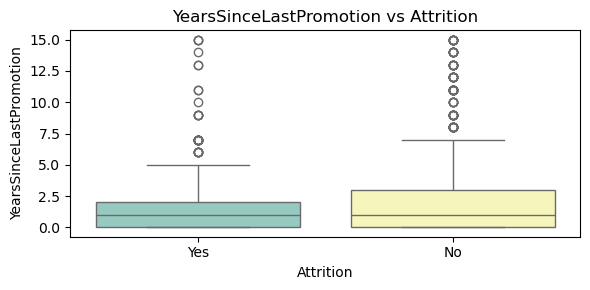

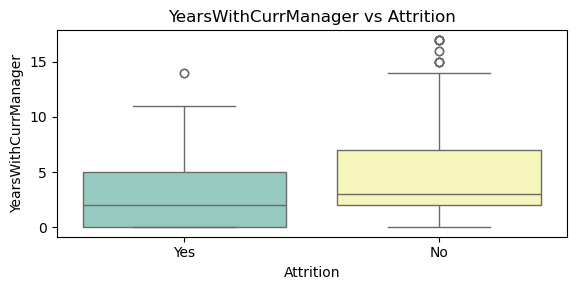

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')
    plt.title(f'{col} vs Attrition')
    plt.tight_layout()
    plt.show()


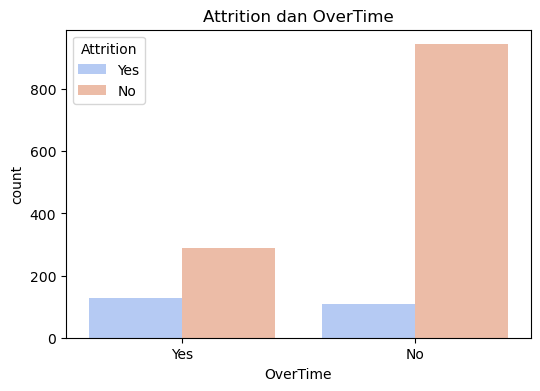

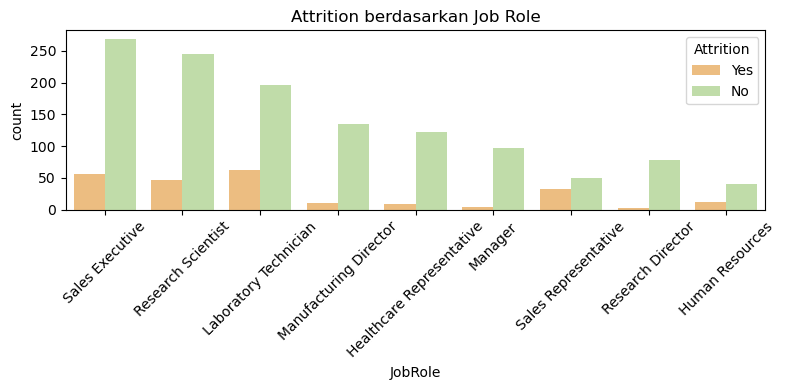

In [22]:
# OverTime
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='coolwarm')
plt.title("Attrition dan OverTime")
plt.show()

# Job Role
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='Spectral')
plt.title("Attrition berdasarkan Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Multivariate Analysis (Reza)

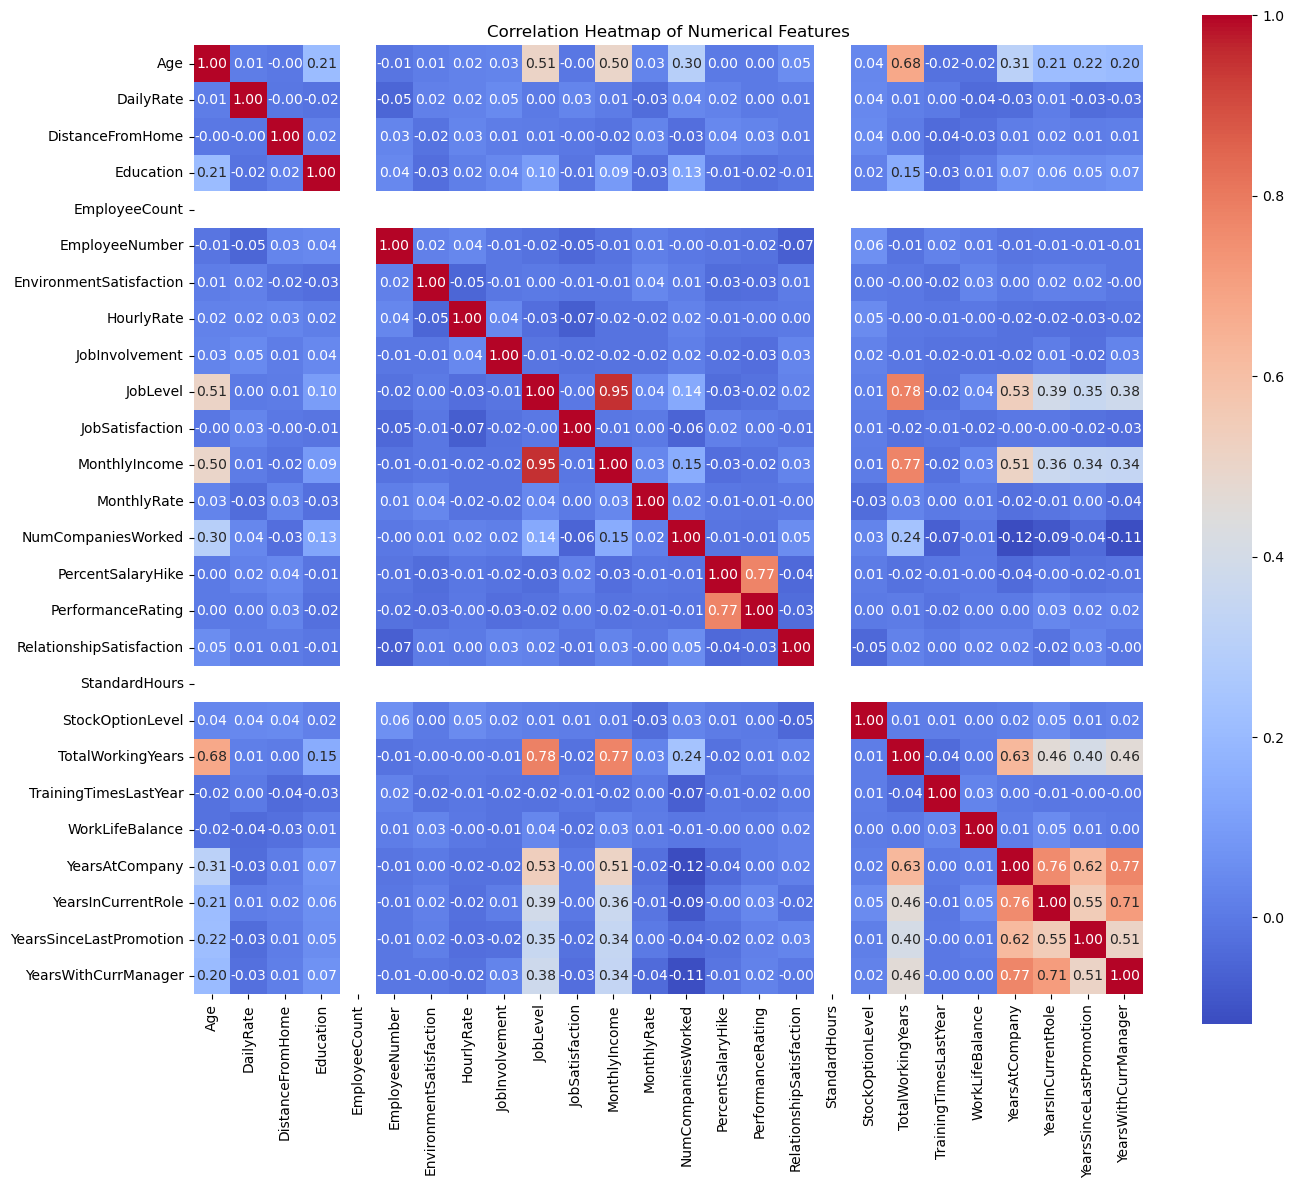

In [24]:
# Select numeric columns and map Attrition
fenumerik = df.select_dtypes(include=['int64', 'float64']).copy()

# Compute correlation matrix
corr_matrix = fenumerik.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Feature Selection (Gibran)

In [26]:
# Cek proporsi attrition
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100

# Hitung nilai rata-rata dari beberapa fitur penting untuk dua grup: Attrition = Yes dan No
risk_factors = df.groupby('Attrition')[[
    'Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears',
    'YearsAtCompany', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobSatisfaction', 'JobInvolvement',
    'WorkLifeBalance', 'OverTime'
]].agg(lambda x: x.mode()[0] if x.dtype == 'O' else x.mean()).reset_index()

risk_factors

,Attrition,Age,MonthlyIncome,DistanceFromHome,TotalWorkingYears,YearsAtCompany,EnvironmentSatisfaction,RelationshipSatisfaction,JobSatisfaction,JobInvolvement,WorkLifeBalance,OverTime
0,No,37.561233,6832.739659,8.915653,11.862936,7.369019,2.771290,2.733982,2.778589,2.770479,2.781022,No
1,Yes,33.607595,4787.092827,10.632911,8.244726,5.130802,2.464135,2.599156,2.468354,2.518987,2.658228,Yes


| Fitur                   | Tetap (No)         | Keluar (Yes)  | Insight Risiko                                |
| ----------------------- | ------------------ | ------------- | --------------------------------------------- |
| **Umur**                | 37.6 tahun         | 33.6 tahun    | Karyawan lebih muda cenderung keluar          |
| **Gaji Bulanan**        | \$6.832            | \$4.787       | Gaji lebih rendah berisiko lebih tinggi       |
| **Jarak dari Rumah**    | 8.9 km             | 10.6 km       | Jarak lebih jauh → lebih rentan               |
| **Total Working Years** | 11.9 tahun         | 8.2 tahun     | Pengalaman kerja lebih sedikit → lebih rentan |
| **Years At Company**    | 7.4 tahun          | 5.1 tahun     | Masa kerja lebih pendek = risiko keluar naik  |
| **Env. Satisfaction**   | 2.77               | 2.46          | Kepuasan lingkungan kerja lebih rendah        |
| **Rel. Satisfaction**   | 2.73               | 2.6           | Kepuasan relasi kerja lebih rendah            |
| **Job Satisfaction**    | 2.78               | 2.47          | Kepuasan kerja lebih rendah                   |
| **Job Involvement**     | 2.78               | 2.51          | Keterlibatan kerja lebih rendah               |
| **Work-Life Balance**   | 2.78               | 2.66          | Keseimbangan kerja lebih rendah               |
| **OverTime**            | No                 | Yes           | Lembur tinggi berhubungan dengan attrition    |


In [28]:
# encode attrion column
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

Cek Fitur Numerik

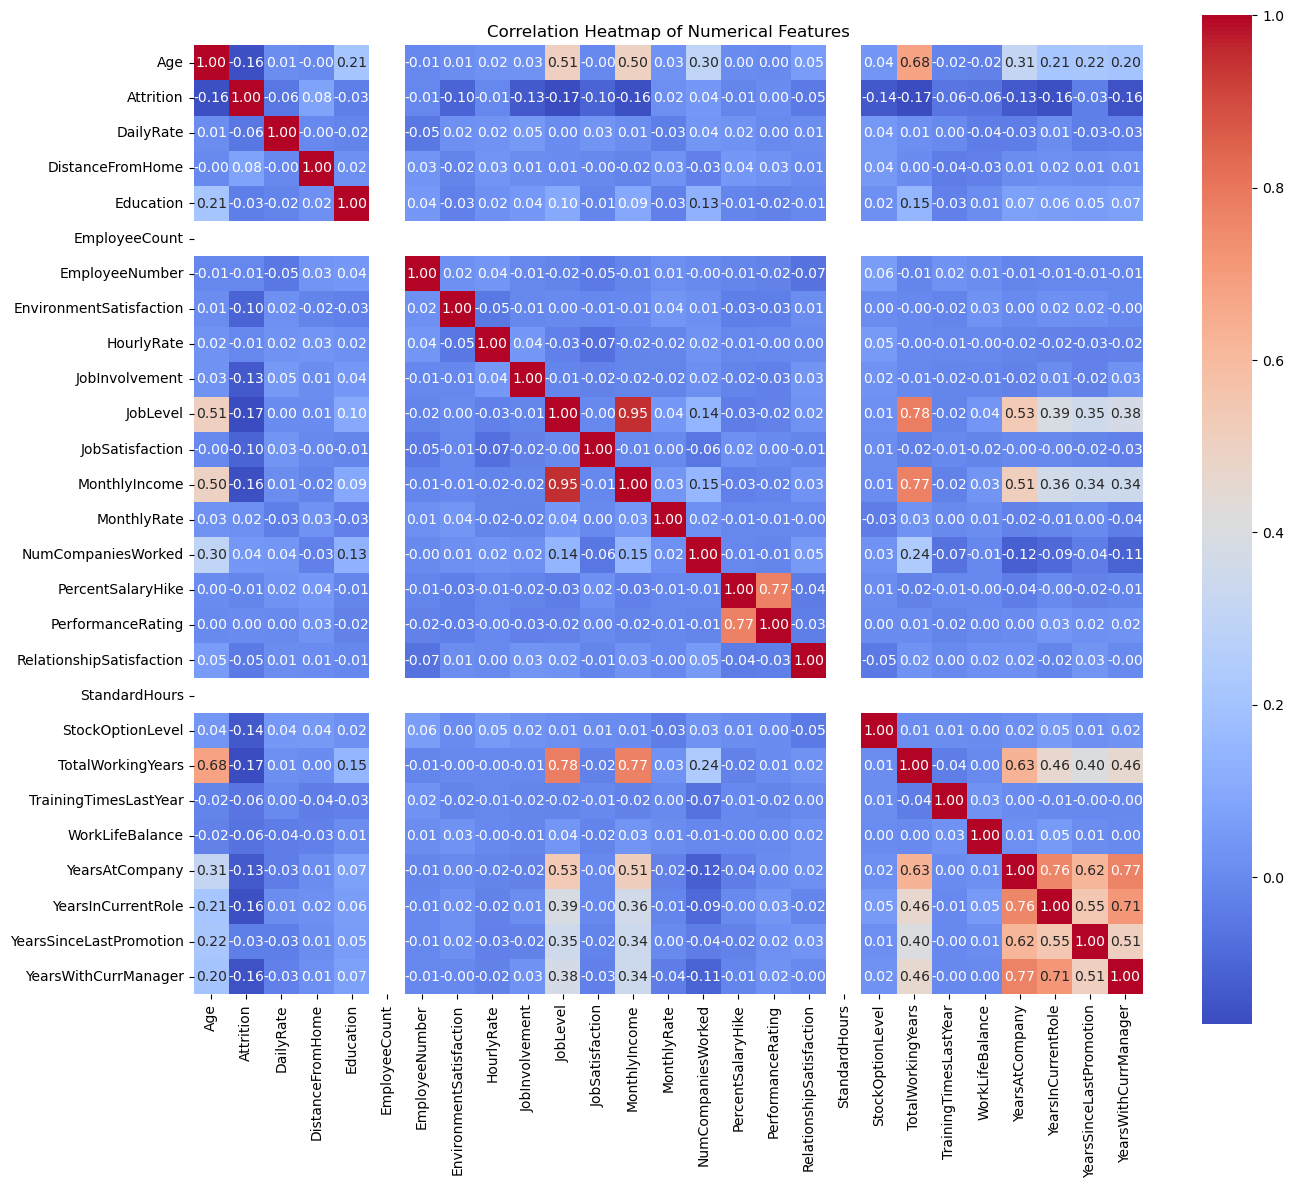

In [30]:
# Select numeric columns and map Attrition
fenumerik = df.select_dtypes(include=['int64', 'float64']).copy()

# Compute correlation matrix
corr_matrix = fenumerik.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [31]:
# Konversi kolom 'Attrition' menjadi numerik
if df['Attrition'].dtype == 'object':
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

if 'Attrition' in df.columns:
    target_corr = df.select_dtypes(include=[np.number]).corr()['Attrition'].sort_values(ascending=True)
    target_corr = target_corr.drop('Attrition', errors='ignore')  # Ignore error if 'Attrition' is missing

    print("\nFeature Importance Analysis:")
    print("   Top 15 features by correlation with target:")
    for i, (feature, corr) in enumerate(target_corr.head(15).items(), 1):
        print(f"   {i:2d}. {feature:25s}: {corr:.4f}")
else:
    print("Kolom 'Attrition' tidak ditemukan di DataFrame.")


if 'Attrition' in df.columns:
    target_corr = df.select_dtypes(include=[np.number]).corr()['Attrition'].sort_values(ascending=False)
    target_corr = target_corr.drop('Attrition', errors='ignore')  # Ignore error if 'Attrition' is missing

    print("\nFeature Importance Analysis:")
    print("   Top 15 features by correlation with target:")
    for i, (feature, corr) in enumerate(target_corr.head(15).items(), 1):
        print(f"   {i:2d}. {feature:25s}: {corr:.4f}")
else:
    print("Kolom 'Attrition' tidak ditemukan di DataFrame.")


Feature Importance Analysis:
   Top 15 features by correlation with target:
    1. TotalWorkingYears        : -0.1711
    2. JobLevel                 : -0.1691
    3. YearsInCurrentRole       : -0.1605
    4. MonthlyIncome            : -0.1598
    5. Age                      : -0.1592
    6. YearsWithCurrManager     : -0.1562
    7. StockOptionLevel         : -0.1371
    8. YearsAtCompany           : -0.1344
    9. JobInvolvement           : -0.1300
   10. JobSatisfaction          : -0.1035
   11. EnvironmentSatisfaction  : -0.1034
   12. WorkLifeBalance          : -0.0639
   13. TrainingTimesLastYear    : -0.0595
   14. DailyRate                : -0.0567
   15. RelationshipSatisfaction : -0.0459

Feature Importance Analysis:
   Top 15 features by correlation with target:
    1. DistanceFromHome         : 0.0779
    2. NumCompaniesWorked       : 0.0435
    3. MonthlyRate              : 0.0152
    4. PerformanceRating        : 0.0029
    5. HourlyRate               : -0.0068
    6. Emp

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur numerik dan target
X = df.select_dtypes(include=['number']).drop(columns=['Attrition'], errors='ignore')  # Ambil hanya kolom numerik
y = df['Attrition']  # Konversi target ke numerik jika perlu

# Buat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Ambil feature importance
feature_importances = model.feature_importances_

# Buat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan hasil
importance_df

,Feature,Importance
11,MonthlyIncome,0.081848
0,Age,0.070337
1,DailyRate,0.067538
5,EmployeeNumber,0.063695
12,MonthlyRate,0.059189
7,HourlyRate,0.057053
19,TotalWorkingYears,0.056323
2,DistanceFromHome,0.055235
13,NumCompaniesWorked,0.043820
22,YearsAtCompany,0.042487


Cek Fitur Katgeorikal

In [34]:
df.groupby('Department')['Attrition'].mean().sort_values(ascending=False)


Department
Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: Attrition, dtype: float64

In [35]:
df.groupby('BusinessTravel')['Attrition'].mean().sort_values(ascending=False)


BusinessTravel
Travel_Frequently    0.249097
Travel_Rarely        0.149569
Non-Travel           0.080000
Name: Attrition, dtype: float64

In [36]:
df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)

JobRole
Sales Representative         0.397590
Laboratory Technician        0.239382
Human Resources              0.230769
Sales Executive              0.174847
Research Scientist           0.160959
Manufacturing Director       0.068966
Healthcare Representative    0.068702
Manager                      0.049020
Research Director            0.025000
Name: Attrition, dtype: float64

In [37]:
df.groupby('MaritalStatus')['Attrition'].mean().sort_values(ascending=False)

MaritalStatus
Single      0.255319
Married     0.124814
Divorced    0.100917
Name: Attrition, dtype: float64

In [38]:
df.groupby('Gender')['Attrition'].mean().sort_values(ascending=False)

Gender
Male      0.170068
Female    0.147959
Name: Attrition, dtype: float64

In [39]:
df.groupby('Over18')['Attrition'].mean().sort_values(ascending=False)

Over18
Y    0.161224
Name: Attrition, dtype: float64

In [40]:
df.groupby('OverTime')['Attrition'].mean().sort_values(ascending=False)

OverTime
Yes    0.305288
No     0.104364
Name: Attrition, dtype: float64

Indikator drop fitur:

Korelasi rendah (< 0.05),

Feature importance rendah,

Redundansi antar fitur,

Konstanta atau ID unik.

| **Fitur**                  | **Alasan**                                                    |
| -------------------------- | ------------------------------------------------------------- |
| `EmployeeCount`            | Konstan → tidak informatif                                    |
| `StandardHours`            | Konstan → tidak informatif                                    |
| `Over18`                   | Konstan ("Y")                                                 |
| `PerformanceRating`        | Korelasi rendah + importance rendah                           |
| `EmployeeNumber`           | ID unik, tidak berguna dalam prediksi                         |
| `Education`                | Korelasi & importance rendah                                  |
| `JobLevel`                 | Korelasi dan importance sangat rendah                         |
| `PercentSalaryHike`        | Korelasi sangat rendah, importance rendah                     |
| `Gender`                   | Perbedaan attrition rate kecil → pengaruh sangat terbatas     |
| `YearsAtCompany`           | Redundan dan korelasi rendah, digantikan `YearsInCurrentRole` |
| `YearsWithCurrManager`     | Redundan, korelasi lebih rendah dari `YearsInCurrentRole`     |
| `NumCompaniesWorked`       | Korelasi dan importance rendah                                |
| `YearsSinceLastPromotion`  | Korelasi sangat rendah, tidak signifikan di model             |
| `RelationshipSatisfaction` | Korelasi sangat rendah, importance rendah                     |


Fitur yang Tetap Dipertahankan, meski korelasinya rendah:

DistanceFromHome

DailyRate

MonthlyRate

HourlyRate

(karena importance tinggi di Random Forest)

In [44]:
# Daftar fitur yang akan dihapus (versi final)
drop_columns = [
    'EmployeeCount',
    'StandardHours',
    'Over18',
    'PerformanceRating',
    'EmployeeNumber',
    'Education',
    'JobLevel',
    'PercentSalaryHike',
    'Gender',
    'YearsAtCompany',
    'YearsWithCurrManager',
    'NumCompaniesWorked',
    'YearsSinceLastPromotion',
    'RelationshipSatisfaction'
]

# Hapus dari dataframe
fecleaned = df.drop(columns=drop_columns)

# Cek hasil
print("Jumlah fitur sebelum drop:", df.shape[1])
print("Jumlah fitur setelah drop:", fecleaned.shape[1])


Jumlah fitur sebelum drop: 35
Jumlah fitur setelah drop: 21


In [45]:
fecleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole
0,41,1,Travel_Rarely,1102,Sales,1,Life Sciences,2,94,3,...,4,Single,5993,19479,Yes,0,8,0,1,4
1,49,0,Travel_Frequently,279,Research & Development,8,Life Sciences,3,61,2,...,2,Married,5130,24907,No,1,10,3,3,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,4,92,2,...,3,Single,2090,2396,Yes,0,7,3,3,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,56,3,...,3,Married,2909,23159,Yes,0,8,3,3,7
4,27,0,Travel_Rarely,591,Research & Development,2,Medical,1,40,3,...,2,Married,3468,16632,No,1,6,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,Medical,3,41,4,...,4,Married,2571,12290,No,1,17,3,3,2
1466,39,0,Travel_Rarely,613,Research & Development,6,Medical,4,42,2,...,1,Married,9991,21457,No,1,9,5,3,7
1467,27,0,Travel_Rarely,155,Research & Development,4,Life Sciences,2,87,4,...,2,Married,6142,5174,Yes,1,6,0,3,2
1468,49,0,Travel_Frequently,1023,Sales,2,Medical,4,63,2,...,2,Married,5390,13243,No,0,17,3,2,6


Dalam proses seleksi fitur, fitur-fitur yang tidak informatif didrop seperti kolom konstan (EmployeeCount, StandardHours, Over18), ID unik (EmployeeNumber), serta fitur dengan korelasi dan kontribusi prediktif rendah (PerformanceRating, PercentSalaryHike, Gender, dll.). Untuk fitur yang redundan seperti YearsAtCompany dan YearsWithCurrManager, kami hanya mempertahankan YearsInCurrentRole karena lebih relevan secara korelasi dan bisnis.

Meski DistanceFromHome, DailyRate, MonthlyRate, dan HourlyRate memiliki korelasi rendah, fitur ini tetap dipertahankan karena memiliki feature importance tinggi dalam model Random Forest, menunjukkan adanya hubungan non-linear. Fitur kategorikal seperti OverTime dan MaritalStatus juga tetap digunakan karena menunjukkan perbedaan attrition rate yang signifikan antar kategori. Pendekatan ini bertujuan menyederhanakan model sambil tetap menjaga akurasi prediksi.

### Feature Engineering (Gibran)

In [48]:

# One-hot encode untuk fitur kategorikal
categorical_cols = df.select_dtypes(include='object').columns
feencoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ==============================
# 🔧 Feature Engineering
# ==============================

# 1. ExperienceRatio
feencoded['ExperienceRatio'] = feencoded['YearsInCurrentRole'] / feencoded['TotalWorkingYears']
feencoded['ExperienceRatio'].replace([float('inf'), -float('inf')], 0, inplace=True)
feencoded['ExperienceRatio'].fillna(0, inplace=True)

# 2. IncomePerYearExp
feencoded['IncomePerYearExp'] = feencoded['MonthlyIncome'] / (feencoded['TotalWorkingYears'] + 1)
feencoded['IncomePerYearExp'].replace([float('inf'), -float('inf')], 0, inplace=True)
feencoded['IncomePerYearExp'].fillna(0, inplace=True)

# 3. AgeExperienceGap
feencoded['AgeExperienceGap'] = feencoded['Age'] - feencoded['TotalWorkingYears']
feencoded['AgeExperienceGap'].fillna(0, inplace=True)

# 4. TenureSatisfaction
feencoded['TenureSatisfaction'] = feencoded['YearsInCurrentRole'] * feencoded['JobSatisfaction']

# Korelasi excluding Attrition
correlation = feencoded.corr()['Attrition'].sort_values(ascending=False).drop('Attrition')
print("Top 20 Korelasi terhadap Attrition:")
print(correlation.head(20))


# Feature Importance

# Ambil fitur numerik & target
X = feencoded.drop(columns=['Attrition'])
y = feencoded['Attrition']

# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Buat DataFrame importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df.head(20))


Top 20 Korelasi terhadap Attrition:
OverTime_Yes                        0.246118
MaritalStatus_Single                0.175419
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
IncomePerYearExp                    0.097731
Department_Sales                    0.080855
DistanceFromHome                    0.077924
EducationField_Technical Degree     0.069355
EducationField_Marketing            0.055781
NumCompaniesWorked                  0.043494
JobRole_Human Resources             0.036215
Gender_Male                         0.029453
JobRole_Sales Executive             0.019774
MonthlyRate                         0.015170
PerformanceRating                   0.002889
JobRole_Research Scientist         -0.000360
HourlyRate                         -0.006846
EmployeeNumber                     -0.010577
PercentSalaryHike                  -0.013478
Name: Attrition, dtype: float64

Feature Importance:
           

Fitur baru yang layak digunakan


| Fitur                | Korelasi    | RF Importance | Alasan                                                              |
| -------------------- | ----------- | ------------- | ------------------------------------------------------------------- |
| `TenureSatisfaction` | **-0.158**  | **0.0455**    | Korelasi kuat dan stabil, kombinasi tenure & kepuasan kerja relevan |
| `IncomePerYearExp`   | **+0.0977** | **0.0669**    | Menunjukkan efisiensi kompensasi per tahun pengalaman               |
| `ExperienceRatio`    | **-0.1029** | **0.0445**    | Mengukur proporsi pengalaman terakhir terhadap total karier         |


Fitur baru yang dapat dibuang


| Fitur              | Korelasi | RF Importance | Alasan                                                        |
| ------------------ | -------- | ------------- | ------------------------------------------------------------- |
| `AgeExperienceGap` | < 0.08   | \~0.02        | Korelasi rendah, kurang memberikan sinyal prediktif yang kuat |


In [51]:
feencoded

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,ExperienceRatio,IncomePerYearExp,AgeExperienceGap,TenureSatisfaction
0,41,1,1102,1,2,1,1,2,94,3,...,False,True,False,False,True,True,0.500000,665.888889,33,16
1,49,0,279,8,1,1,2,3,61,2,...,True,False,False,True,False,False,0.700000,466.363636,39,14
2,37,1,1373,2,2,1,4,4,92,2,...,False,False,False,False,True,True,0.000000,261.250000,30,0
3,33,0,1392,3,4,1,5,4,56,3,...,True,False,False,True,False,True,0.875000,323.222222,25,21
4,27,0,591,2,1,1,7,1,40,3,...,False,False,False,True,False,False,0.333333,495.428571,21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,False,False,False,True,False,False,0.117647,142.833333,19,8
1466,39,0,613,6,1,1,2062,4,42,2,...,False,False,False,True,False,False,0.777778,999.100000,30,7
1467,27,0,155,4,3,1,2064,2,87,4,...,False,False,False,True,False,True,0.333333,877.428571,21,4
1468,49,0,1023,2,3,1,2065,4,63,2,...,False,True,False,True,False,False,0.352941,299.444444,32,12


In [52]:
femodel = feencoded.copy().drop(['AgeExperienceGap','MonthlyRate','HourlyRate','DailyRate'], axis=1)
femodel

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,ExperienceRatio,IncomePerYearExp,TenureSatisfaction
0,41,1,1,2,1,1,2,3,2,4,...,False,False,True,False,False,True,True,0.500000,665.888889,16
1,49,0,8,1,1,2,3,2,2,2,...,False,True,False,False,True,False,False,0.700000,466.363636,14
2,37,1,2,2,1,4,4,2,1,3,...,False,False,False,False,False,True,True,0.000000,261.250000,0
3,33,0,3,4,1,5,4,3,1,3,...,False,True,False,False,True,False,True,0.875000,323.222222,21
4,27,0,2,1,1,7,1,3,1,2,...,False,False,False,False,True,False,False,0.333333,495.428571,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,1,2061,3,4,2,4,...,False,False,False,False,True,False,False,0.117647,142.833333,8
1466,39,0,6,1,1,2062,4,2,3,1,...,False,False,False,False,True,False,False,0.777778,999.100000,7
1467,27,0,4,3,1,2064,2,4,2,2,...,False,False,False,False,True,False,True,0.333333,877.428571,4
1468,49,0,2,3,1,2065,4,2,2,2,...,False,False,True,False,True,False,False,0.352941,299.444444,12


In [53]:
femodel.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'J

Sebagai bagian dari tahap feature engineering, dikembangkan beberapa fitur baru untuk memperkaya representasi data dan meningkatkan performa model. Tiga fitur yang terbukti paling relevan adalah: TenureSatisfaction (hasil perkalian antara lamanya seseorang menjabat posisi terakhir dengan tingkat kepuasan kerjanya), IncomePerYearExp (rasio antara pendapatan bulanan dan total tahun pengalaman kerja), serta ExperienceRatio (proporsi waktu di posisi terakhir dibandingkan total pengalaman kerja). Ketiganya menunjukkan korelasi yang cukup kuat dengan target attrition dan memiliki feature importance tinggi dalam model Random Forest, menjadikannya fitur yang layak digunakan dalam proses prediksi.

## **Data Preparation / Preprocessing**

### Data Splitting (Erick)

In [57]:
X = femodel.drop('Attrition', axis=1)
y = femodel['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 47)
X_test shape: (294, 47)
y_train shape: (1176,)
y_test shape: (294,)


### Outlier Handling (Erick)

In [59]:
# numerical_cols = X_train.select_dtypes(include=np.number).columns

# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(5, 6, i + 1)
#     sns.boxplot(y=X_train[col])
#     plt.title(col)
#     plt.tight_layout()
# plt.show()

In [60]:
# # Handle Outliers
# for col in numerical_cols:
#     Q1 = X_train[col].quantile(0.25)
#     Q3 = X_train[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

In [61]:
# # Check after outlier handling
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(5, 6, i + 1)
#     sns.boxplot(y=X_train[col])
#     plt.title(col)
#     plt.tight_layout()
# plt.show()

### Transformasi (Erick)

#### *Log Transform* (Tidak Perlu)

In [64]:
# # Pilih kolom numerik
# numerical_cols_for_log = X_train.select_dtypes(include=np.number).columns

# # Transformasi log1puntuk kolom yang semua nilainya positif di X_train dan X_test
# for col in numerical_cols_for_log:
#     if (X_train[col] > 0).all() and (X_test[col] > 0).all():
#         X_train[col] = np.log1p(X_train[col])
#         X_test[col] = np.log1p(X_test[col])


#### *Standardize*

In [66]:
# Pilih kolom numerik
numerical_cols_to_standardize = X_train.select_dtypes(include=np.number).columns

# Inisialisasi scaler
scaler = StandardScaler()

# Transformasi standardisasi
X_train[numerical_cols_to_standardize] = scaler.fit_transform(X_train[numerical_cols_to_standardize])
X_test[numerical_cols_to_standardize] = scaler.transform(X_test[numerical_cols_to_standardize])

#### *Normalize* (Tidak Perlu, Sudah Terstandardisasi)

In [68]:
# from sklearn.preprocessing import MinMaxScaler

# # Identifikasi kolom numerik
# numerical_cols_to_normalize = X_train.select_dtypes(include=np.number).columns

# # Inisialisasi MinMaxScaler
# minmax_scaler = MinMaxScaler()

# # Normalisasi data latih dan data uji
# X_train[numerical_cols_to_normalize] = minmax_scaler.fit_transform(X_train[numerical_cols_to_normalize])
# X_test[numerical_cols_to_normalize] = minmax_scaler.transform(X_test[numerical_cols_to_normalize])


### Encoding (Bila Perlu) (Erick) (Sudah Dilakukan di Feature Engineering)

### Imbalance Handling (Hanya data Train) (Erick)

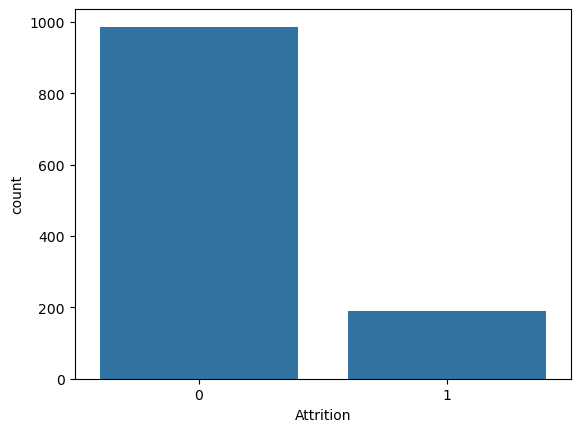

In [71]:
y_train_show = y_train.to_frame()
sns.countplot(data=y_train_show,x='Attrition')
plt.show()

In [72]:
smote = SMOTE(random_state=0)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

  File "C:\Users\a s u s\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


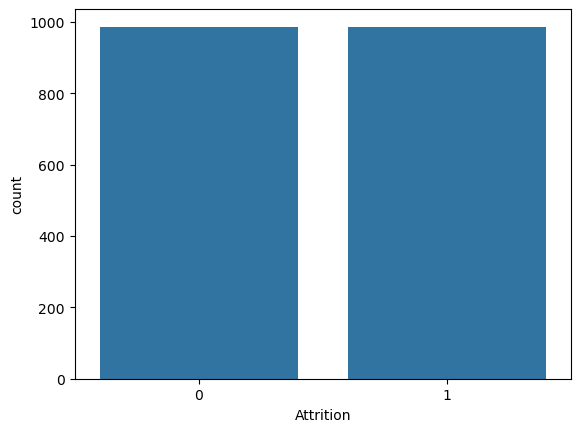

In [73]:
y_train_show2 = y_train_resampled.to_frame()
sns.countplot(data=y_train_show2,x='Attrition')
plt.show()

Melakukan oversampling dengan SMOTE untuk mencegah model overfit pada label mayoritas

### Preprocessing Pipeline (Perlu Discusi dengan Mentor)

## Modeling

### Library For Modeling

In [132]:
from sklearn.linear_model import LogisticRegression

### Train (.fit) And Predict (.predict) Baseline Model

In [141]:
# Inisialisasi model Logistic Regression
model_lr = LogisticRegression(random_state=42, solver='liblinear')

# Latih model menggunakan data training yang sudah di-resampling
model_lr.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42, solver='liblinear')

### Hyperparameter Tunning

### Final Model

## Model Evaluation

### Test the Prediction of Final Model

### Evaluation Metrics

### Visualitasion Actual vs Prediction (if needed)

# Pipeline

Pipeline Keseluruhan

In [88]:
import numpy as np
import pandas as pd

# split & CV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# base & transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# model & metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# load data
df = pd.read_csv("ibm data.csv").copy()

# map target ke 0/1
if df["Attrition"].dtype == object:
    df["Attrition"] = df["Attrition"].map({"No": 0, "Yes": 1}).astype(int)


# drop kolom
DROP_COLS = [
    "EmployeeCount","StandardHours","Over18","PerformanceRating",
    "EmployeeNumber","Education","JobLevel","PercentSalaryHike","Gender",
    "YearsAtCompany","YearsWithCurrManager","NumCompaniesWorked",
    "YearsSinceLastPromotion","RelationshipSatisfaction"
]

df = df.drop(columns=[c for c in DROP_COLS if c in df.columns])


# feature engineering
def apply_fe(fe):
    fe = fe.copy()
    if {"YearsInCurrentRole","TotalWorkingYears"}.issubset(fe.columns):
        denom = fe["TotalWorkingYears"].replace(0, np.nan)
        fe["ExperienceRatio"] = (fe["YearsInCurrentRole"] / denom).fillna(0)

    if {"MonthlyIncome","TotalWorkingYears"}.issubset(fe.columns):
        fe["IncomePerYearExp"] = fe["MonthlyIncome"] / (fe["TotalWorkingYears"] + 1)

    if {"YearsInCurrentRole","JobSatisfaction"}.issubset(fe.columns):
        fe["TenureSatisfaction"] = fe["YearsInCurrentRole"] * fe["JobSatisfaction"]
    return fe

df_fe = apply_fe(df)

# split data
X = df_fe.drop(columns=["Attrition"])
y = df_fe["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# encoding & scaling/standarisasi
prep = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), selector(dtype_exclude=np.number)),
    ],
    remainder="drop"
)

# pipeline
pipe = ImbPipeline(steps=[
    ("prep", prep),
    ("smote", SMOTE(random_state=42)),
    ("clf", RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)) # bisa tambah ata ganti model lain 
])


# ngetest doang
# cv di train 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1  = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1")
cv_auc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="roc_auc")
print("CV F1  :", np.round(cv_f1, 3),  "| mean =", cv_f1.mean().round(3))
print("CV AUC :", np.round(cv_auc, 3), "| mean =", cv_auc.mean().round(3))

# fit di train, predict di test
pipe.fit(X_train, y_train)
y_pred  = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]
print("\n=== TEST REPORT ===")
print(classification_report(y_test, y_pred, digits=4))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba).round(4))

CV F1  : [0.44  0.208 0.448 0.491 0.485] | mean = 0.415
CV AUC : [0.774 0.726 0.822 0.869 0.781] | mean = 0.794

=== TEST REPORT ===
              precision    recall  f1-score   support

           0     0.8856    0.9717    0.9266       247
           1     0.6957    0.3404    0.4571        47

    accuracy                         0.8707       294
   macro avg     0.7906    0.6560    0.6919       294
weighted avg     0.8552    0.8707    0.8516       294

Test ROC-AUC: 0.8154
